In [31]:
from importlib import reload
from sklearn import manifold
import docvec
import matplotlib.pyplot as plt
reload(docvec)
import pandas as pd

In [102]:
df = pd.read_json("Complied_data.json", orient="split")
df = df.head(4000)

In [107]:
f1 = np.array(df["Title"].str.contains("school"))
f2 = np.array(df["Title"].str.contains("best"))
f3 = np.array(df["Title"].str.contains("work"))
f4 = np.array(df["Title"].str.contains("fun"))

In [10]:
d = docvec.doc_vec()
d.generate_faiss()

Starting to load data
Loaded the data
Creating dataset
Finished creating the dataset


In [103]:
tnse = manifold.TSNE(perplexity=500, n_iter=10000)

In [67]:
tnse

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=10000, n_iter_without_progress=300, perplexity=10,
     random_state=None, verbose=0)

In [109]:
Y = tnse.fit_transform(d.data[:4000])

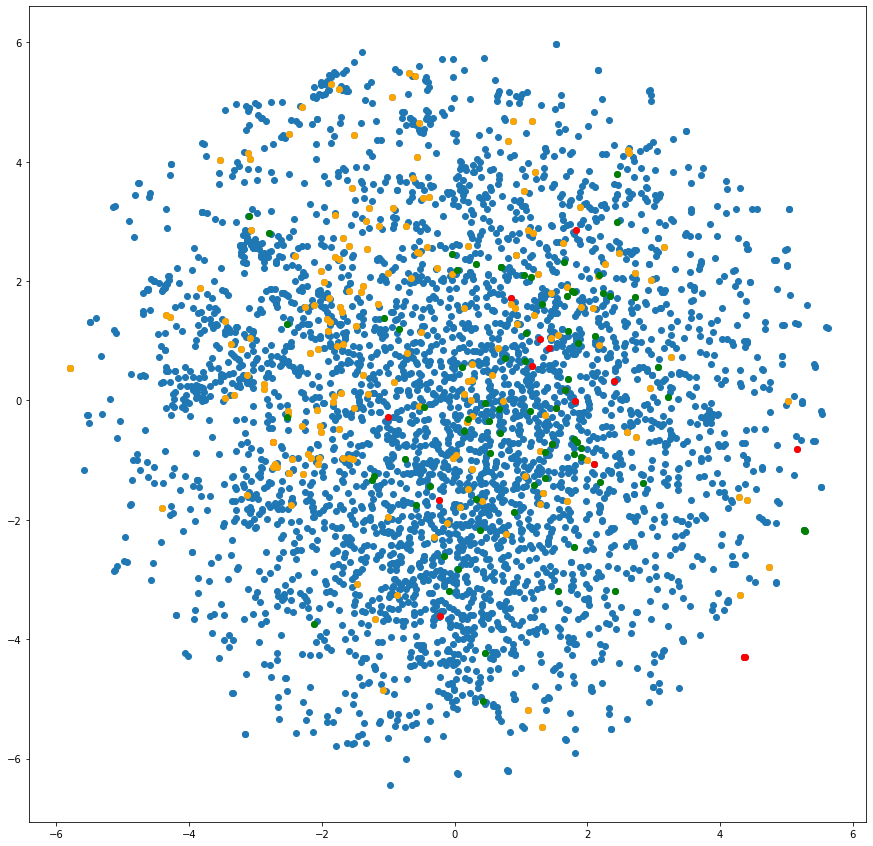

In [110]:
fig = plt.figure()
fig.set_size_inches(15, 15)
g = fig.add_subplot(111)
g.scatter(Y[:,0], Y[:,1])
g.scatter(Y[:,0][f1], Y[:,1][f1], color="red")
g.scatter(Y[:,0][f2], Y[:,1][f2], color="orange")
g.scatter(Y[:,0][f3], Y[:,1][f3], color="green")
g.scatter(Y[:,0][f3], Y[:,1][f3], color="green")
plt.show()